![](fig/univ.png)

# AI-2: Convolutional Neural Network
## Homework 1: Artificial Neural Networks, Model Interpretation, and Regularization

**AI2 Cohort 1**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas<br />
**Maximum Score**: 100

<hr style="height:2.4pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML

In [2]:
import random
random.seed(112358)

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# TensorFlow and tf.keras
import tensorflow as tf

%matplotlib inline

### INSTRUCTIONS


- This homework is a jupyter notebook. Download and work on it on your local machine.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

- **Ensure you make appropraite plots for all the questions it is applicable to, regardless of it being explicitly asked for.**

<hr style="height:2pt">

### Names of the people who worked on this homework together
#### Ashtosh Sarda
#### Vishal Rishi MK

<a id="contents"></a>

## Notebook Contents

- [**PART 1 [50 pts]: Model interpretation and predictive intervals in NN**](#part1)
  - [Overview and Data Description](#part1intro)
  - [Questions](#part1questions)
  - [Solutions](#part1solutions)


- [**PART 2 [50 pts]: Kannada MNIST Kaggle competition**](#part2)
  - [Problem Statement](#part2intro)
  - [The Kannada MNIST Dataset](#part2about)
  - [Downloading the Data Files](#part2data)
  - [AI2-C1 Homework1 Kaggle Competition](#part2kaggle)
  - [Questions](#part2questions)
  - [Solutions](#part2solutions)


---

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
<h1> PART 1 [50 pts]: Model interpretation and predictive intervals in NN </h1> 

<br />


<a id="part1intro"></a>

<b> Overview and Data Description </b>
<br /><br />
[Return to contents](#contents)
<br />
In this problem, you will be building and interpreting models to predict whether a flight was delayed for its arrival based on features that could be measured as the flight takes off.  
We will also estimate the predictive intervals of the model using bootstrapping. We will utilize those predictive intervals to build a new kind of model: a model that refrains from making a prediction when it is not confident.  


The included variables are:
<br /><br />
**ARRIVAL_DELAY**: the difference between scheduled arrival and actual arrival, in minutes (positive is late, negative is early).
<br /><br />
**DISTANCE**: the distance between arrival and departure airports, in miles.
<br /><br />
**SCHEDULED_TIME**: the flight's scheduled travel time.
<br /><br />
**MONTH**: the month the flight took off, 1 = January, 2 = February, etc.
<br /><br />
**SCHED_DEP_HOUR**: the scheduled departure time (the hour of the day).
<br /><br />
**SCHED_ARR_HOUR**: the scheduled arrival time (the hour of the day).
<br /><br />
**FLIGHT_COUNT**: the number of flights flying out of that airport before noon on a typical day.
<br /><br />
**DAY_OF_WEEK**: the day of the week, 1 = Monday, 2 = Tuesday, etc.
<br /><br />
**ORIGIN_AIRPORT**: the airport the flight took off from.
<br /><br />
**DESTINATION_AIRPORT**: the airport the flight was scheduled to land at.
<br /><br />
For the airport codes, see: https://www.bts.gov/topics/airlines-and-airports/world-airport-codes

To sucessfully complete this part, you will proceed by fitting a NN model, evaluating its accuracy, interpreting the predictors' importance, and finally evaluating the predictive intervals.
<br /><br />
**NOTE:** The observations were sampled so that roughly half of the observations were delayed and half of the observations were not delayed.

</div> 

<a id="part1solutions"></a>

## PART 1: Solutions

[Return to contents](#contents)


<div class='exercise-r'>  

**1.1**

</div>

In [3]:
# Load the dataset
data=pd.read_csv('flights.csv')
data.head()

,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,MONTH,SCHED_DEP_HOUR,SCHED_ARR_HOUR,FLIGHT_COUNT,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,23.0,2586,342.0,9,7,15,240,3,SFO,JFK
1,10.0,1235,185.0,5,6,11,366,4,LAX,DFW
2,-7.0,184,76.0,4,17,18,172,7,BOS,LGA
3,68.0,862,148.0,7,19,21,260,7,IAH,DEN
4,24.0,236,71.0,3,20,21,266,2,LAS,LAX


In [4]:
# Function to create the response variable
def delay(x):
    if x>=15:
        return 1.
    else:
        return 0.
data['DELAY_OR_NOT']=data['ARRIVAL_DELAY'].apply(delay)

In [5]:
data.head()

,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,MONTH,SCHED_DEP_HOUR,SCHED_ARR_HOUR,FLIGHT_COUNT,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DELAY_OR_NOT
0,23.0,2586,342.0,9,7,15,240,3,SFO,JFK,1.0
1,10.0,1235,185.0,5,6,11,366,4,LAX,DFW,0.0
2,-7.0,184,76.0,4,17,18,172,7,BOS,LGA,0.0
3,68.0,862,148.0,7,19,21,260,7,IAH,DEN,1.0
4,24.0,236,71.0,3,20,21,266,2,LAS,LAX,1.0


<div class='exercise-r'>  

**1.1.2**
    
</div>

In [6]:
data.describe() #No missing values

,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,MONTH,SCHED_DEP_HOUR,SCHED_ARR_HOUR,FLIGHT_COUNT,DAY_OF_WEEK,DELAY_OR_NOT
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,24.905600,830.09400,142.704100,6.293400,14.058100,15.477600,202.177000,3.862200,0.493100
std,53.757408,603.76412,74.979868,3.346586,4.872135,5.297009,180.306263,1.966519,0.499977
min,-63.000000,67.00000,30.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,-8.000000,383.00000,86.000000,3.000000,10.000000,12.000000,48.000000,2.000000,0.000000
50%,13.000000,674.00000,125.000000,6.000000,15.000000,16.000000,179.000000,4.000000,0.000000
75%,37.000000,1068.00000,174.000000,9.000000,18.000000,20.000000,266.000000,5.000000,1.000000
max,1152.000000,4983.00000,581.000000,12.000000,23.000000,23.000000,581.000000,7.000000,1.000000


In [7]:
# Create the one-hot encoded variables for ORIGIN_AIRPORT and DESTINATION_AIRPORT
dummy_1=data['ORIGIN_AIRPORT'].str.get_dummies()
dummy_2=data['DESTINATION_AIRPORT'].str.get_dummies()
data=data.drop(['ORIGIN_AIRPORT','DESTINATION_AIRPORT','ARRIVAL_DELAY'],axis=1)
data=pd.concat([data,dummy_1,dummy_2],axis=1)

# Remove a column from the dummy variables to prevent multi-collinearity
data=data.drop(['LAX'],axis=1)
data.head()

,DISTANCE,SCHEDULED_TIME,MONTH,SCHED_DEP_HOUR,SCHED_ARR_HOUR,FLIGHT_COUNT,DAY_OF_WEEK,DELAY_OR_NOT,10140,10208,...,TUL,TUS,TVC,TYR,TYS,VLD,VPS,XNA,YAK,YUM
0,2586,342.0,9,7,15,240,3,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1235,185.0,5,6,11,366,4,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,184,76.0,4,17,18,172,7,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,862,148.0,7,19,21,260,7,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,236,71.0,3,20,21,266,2,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Response and the predictors
X=data.drop(['DELAY_OR_NOT'],axis=1)
y=data['DELAY_OR_NOT']

In [9]:
# Scale the dateset
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [10]:
# Split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=111)

In [11]:
print('Shape of X train data:',X_train.shape)
print('Shape of y train data:',y_train.shape)
print('Shape of X test data:',X_test.shape)
print('Shape of y test data:',y_test.shape)

Shape of X train data: (8000, 808)
Shape of y train data: (8000,)
Shape of X test data: (2000, 808)
Shape of y test data: (2000,)


<div class='exercise-r'>  
    
**1.2**
    
</div>

In [12]:
# Neural network architecture 
tf.keras.backend.set_floatx('float64')
model=tf.keras.models.Sequential(name='NN_model')
model.add(tf.keras.layers.Dense(15,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=tf.keras.regularizers.l1(l1=0.1)))
model.add(tf.keras.layers.Dense(15,activation='selu',kernel_initializer='lecun_normal'))
model.add(tf.keras.layers.Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [13]:
history=model.fit(X_train,y_train,validation_split=0.2,epochs=150,verbose=0)

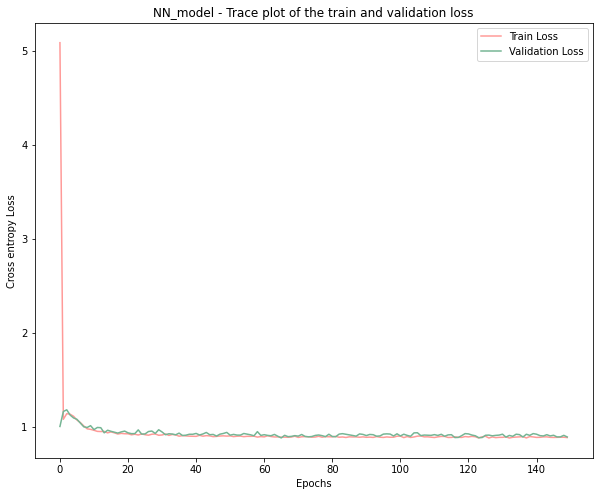

In [14]:
# Plot the MSE of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("NN_model - Trace plot of the train and validation loss")
plt.plot(history.history['loss'], label='Train Loss', color='#FF9A98')
plt.plot(history.history['val_loss'],  label='Validation Loss', color='#75B594')
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('Cross entropy Loss')
plt.legend()
plt.show()

In [15]:
# Model predictions on train and test set
y_train_hat=np.argmax(model.predict(X_train),axis=-1)
y_test_hat=np.argmax(model.predict(X_test),axis=-1)

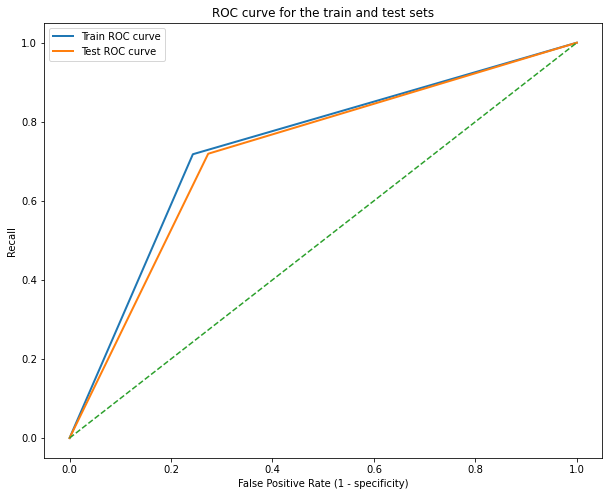

In [52]:
from sklearn.metrics import roc_curve
ft,tt,t1=roc_curve(y_train,y_train_hat)
fte,tte,t2=roc_curve(y_test,y_test_hat)
plt.plot(ft,tt,linewidth=2,label='Train ROC curve')
plt.plot(fte,tte,linewidth=2,label='Test ROC curve')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('Recall')
plt.title('ROC curve for the train and test sets')
plt.legend()

In [16]:
print("NN_model_train_auc:", roc_auc_score(y_train, y_train_hat))
print("NN_model_test_auc:", roc_auc_score(y_test, y_test_hat))

NN_model_train_auc: 0.7373906842585333
NN_model_test_auc: 0.722919807635167


In [17]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.8986 - accuracy: 0.7230


[0.8985522892594483, 0.723]

In [18]:
print("NN_model_train_accuracy:", accuracy_score(y_train, y_train_hat))
print("NN_model_test_accuracy:", accuracy_score(y_test, y_test_hat))

NN_model_train_accuracy: 0.737625
NN_model_test_accuracy: 0.723


<div class='exercise-r'>

**1.3**

</div>

In [19]:
# Logistic regression model
logreg=LogisticRegression(max_iter=500,solver='lbfgs')
logreg.fit(X_train,y_train_hat)

LogisticRegression(max_iter=500)

In [20]:
# Model predictions on train and test
y_train_log_hat=logreg.predict(X_train)
y_test_log_hat=logreg.predict(X_test)

In [21]:
print("logistic_regression_train_accuracy:", accuracy_score(y_train,y_train_log_hat))
print("logistic_regression_test_accuracy:", accuracy_score(y_test,y_test_log_hat))

logistic_regression_train_accuracy: 0.738625
logistic_regression_test_accuracy: 0.7255


In [22]:
# Perform feature importance analysis using sklearn's permutation importance
# Display the top ten important features  
result=permutation_importance(logreg,X_test,y_test,random_state=0,n_jobs=-1)
features=[]
for i in result.importances_mean.argsort()[::-1][:10]:
    features.append(X.columns[i])
    print(f"{X.columns[i]:<8}"
          f"{result.importances_mean[i]:.3f}"
          f" +/- {result.importances_std[i]:.3f}")

SCHED_DEP_HOUR0.185 +/- 0.012
MONTH   0.013 +/- 0.004
ATL     0.005 +/- 0.002
MSP     0.005 +/- 0.001
LGA     0.003 +/- 0.001
SEA     0.003 +/- 0.001
DAY_OF_WEEK0.003 +/- 0.002
SFO     0.003 +/- 0.001
SCHED_ARR_HOUR0.002 +/- 0.002
JFK     0.002 +/- 0.001


In [23]:
# Calculate the relative importance of the features
rel_importance=sorted(result.importances_mean/max(result.importances_mean),reverse=True)

Text(0.5, 1.0, 'Bar plot showing the relative importance of the top ten features')

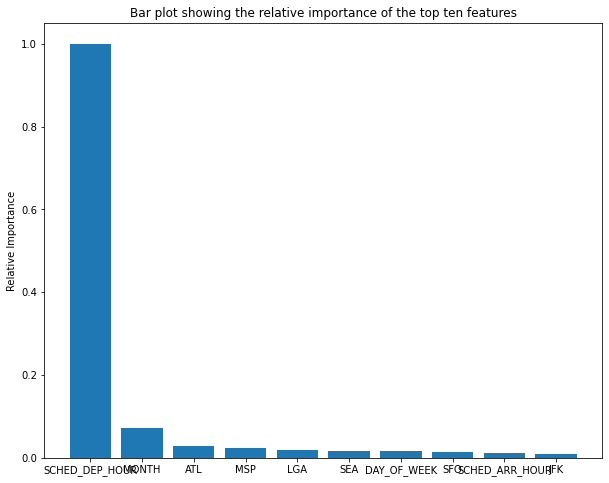

In [24]:
# Bar plot showing the relative importance of the top ten features
plt.bar(features,rel_importance[:10])
plt.ylabel('Relative Importance')
plt.title('Bar plot showing the relative importance of the top ten features')

<div class='exercise-r'>

**1.4**    

**1.4.1**

</div>

In [25]:
X_copy=X.copy()

In [26]:
X_copy=pd.DataFrame(scaler.transform(X_copy),columns=X.columns)
a=list(X.columns)
a.remove('SCHED_DEP_HOUR')
for col in a:
    X_copy[col]=X_copy[col]-X_copy[col]

In [27]:
y_pred=model.predict(X_copy)[:,-1]

Text(0.5, 1.0, 'Plot of model prediction vs SCHED_DEP_HOUR')

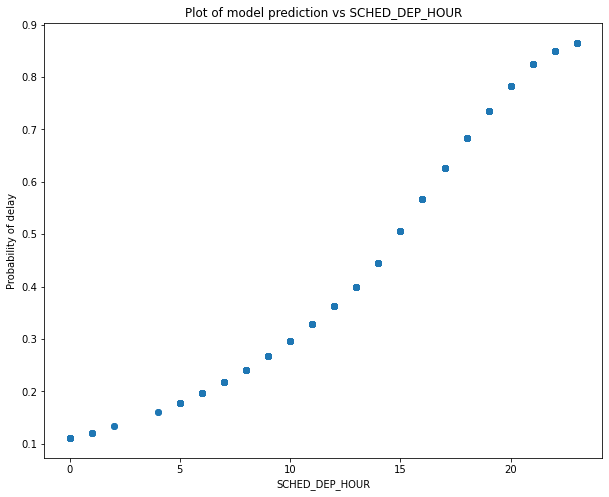

In [28]:
# Plot of model prediction vs SCHED_DEP_HOUR
plt.scatter(X['SCHED_DEP_HOUR'],y_pred)
plt.xlabel('SCHED_DEP_HOUR')
plt.ylabel('Probability of delay')
plt.title('Plot of model prediction vs SCHED_DEP_HOUR')

**INTERPRETATION:**

From the plot, we can see that the model predicts higher probabilities for higher values of SCHED_DEP_HOUR. There is direct proportionality between the two quantities. This shows that SCHED_DEP_HOUR is an important predictor for this particular model.

<div class='exercise-r'>

**1.4.2**
</div>

In [29]:
X_copy=X.copy()
X_copy=pd.DataFrame(scaler.transform(X_copy),columns=X.columns)
a=list(X.columns)
a.remove('SCHED_DEP_HOUR')
a.remove('FLIGHT_COUNT')
for col in a:
    X_copy[col]=X_copy[col]-X_copy[col]

In [30]:
y_pred=model.predict(X_copy)[:,-1]

Text(0.5, 1.0, 'Plot of FLIGHT_COUNT vs SCHED_DEP_HOUR')

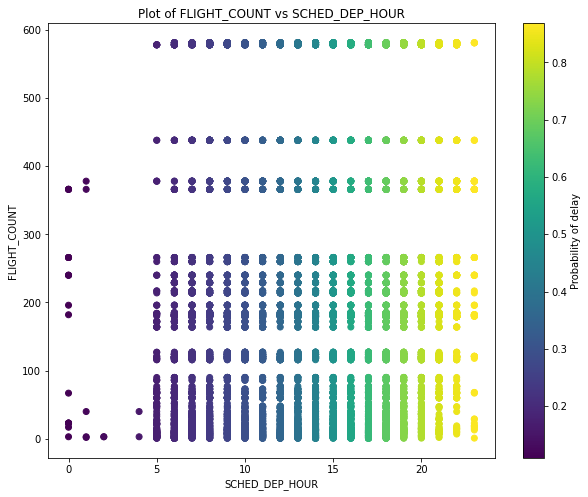

In [31]:
# Plot of FLIGHT_COUNT vs SCHED_DEP_HOUR
plt.scatter(X['SCHED_DEP_HOUR'],X['FLIGHT_COUNT'],c=y_pred)
plt.xlabel('SCHED_DEP_HOUR')
plt.ylabel('FLIGHT_COUNT')
plt.colorbar(label='Probability of delay')
plt.title('Plot of FLIGHT_COUNT vs SCHED_DEP_HOUR')

<div class='exercise-r'>

**1.4.3**
    
</div>

In [32]:
X_copy=X.copy()
X_copy=pd.DataFrame(scaler.transform(X_copy),columns=X.columns)
a=list(X.columns)
a.remove('SCHED_DEP_HOUR')
a.remove('SCHED_ARR_HOUR')
for col in a:
    X_copy[col]=X_copy[col]-X_copy[col]

In [33]:
y_pred=model.predict(X_copy)[:,-1]

Text(0.5, 1.0, 'Plot of SCHED_ARR_HOUR vs SCHED_DEP_HOUR')

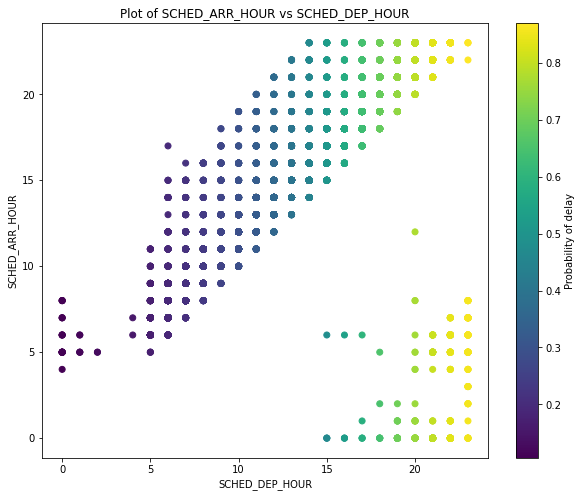

In [34]:
# Plot of SCHED_ARR_HOUR vs SCHED_DEP_HOUR
plt.scatter(X['SCHED_DEP_HOUR'],X['SCHED_ARR_HOUR'],c=y_pred)
plt.xlabel('SCHED_DEP_HOUR')
plt.ylabel('SCHED_ARR_HOUR')
plt.colorbar(label='Probability of delay')
plt.title('Plot of SCHED_ARR_HOUR vs SCHED_DEP_HOUR')

<div class='exercise-r'>

**1.4.4**
    
</div>

In [35]:
X_copy=X.copy()
X_copy=pd.DataFrame(scaler.transform(X_copy),columns=X.columns)
a=list(X.columns)
a.remove('SCHED_DEP_HOUR')
a.remove('DISTANCE')
for col in a:
    X_copy[col]=X_copy[col]-X_copy[col]

In [36]:
y_pred=model.predict(X_copy)[:,-1]

Text(0.5, 1.0, 'Plot of DISTANCE vs SCHED_DEP_HOUR')

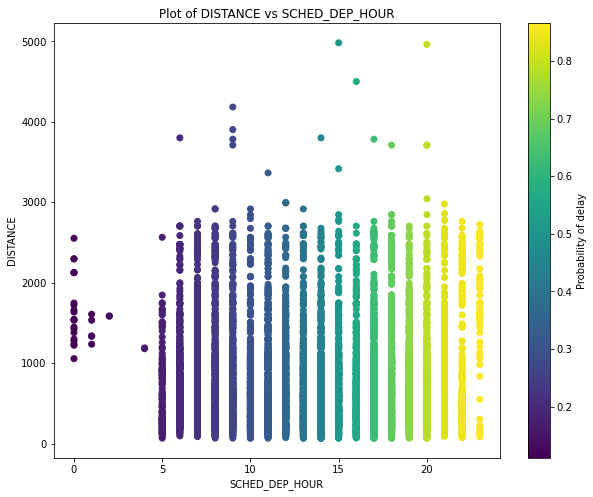

In [37]:
# Plot of DISTANCE vs SCHED_DEP_HOUR
plt.scatter(X['SCHED_DEP_HOUR'],X['DISTANCE'],c=y_pred)
plt.xlabel('SCHED_DEP_HOUR')
plt.ylabel('DISTANCE')
plt.colorbar(label='Probability of delay')
plt.title('Plot of DISTANCE vs SCHED_DEP_HOUR')

**INTERPRETATION:**

We know from 1.4.1 that SCHED_DEP_HOUR is an important predictor for the model. From the plots of 1.4.2, 1.4.3, and 1.4.4, we can conclude that as the variables on the y-axis varies (FLIGHT_COUNT, SCHED_ARR_HOUR, DISTANCE), the probability of delay predicted by the model does not vary (No colour variation along y-axis). This is an indication that the predictors (FLIGHT_COUNT, SCHED_ARR_HOUR, DISTANCE) does not have a huge impact on the model.

<div class='exercise-r'>

**1.5**

</div>

In [38]:
def progressbar(n_step, n_total):
    """Prints self-updating progress bar to stdout to track for-loop progress
    
    There are entire 3rd-party libraries dedicated to custom progress-bars.
    A simple function like this is often more than enough to get the job done.
    
    :param n_total: total number of expected for-loop iterations
    :type n_total: int
    :param n_step: current iteration number, starting at 0
    :type n_step: int

    .. example::
    
        for i in range(n_iterations):
            progressbar(i, n_iterations)
            
    .. source:
    
        This function is a simplified version of code found here:
        https://stackoverflow.com/questions/3160699/python-progress-bar/15860757#15860757
    """
    n_step = n_step + 1
    barlen = 50
    progress = n_step / n_total
    block = int(round(barlen * progress))
    status = ""
    if n_step == n_total:
        status = "Done...\r\n\n"
    text = "\r [{0}] {1}/{2} {3}".format(
        "=" * block + "-" * (barlen - block),
        n_step,
        n_total,
        status,
    )
    sys.stdout.write(text)
    sys.stdout.flush()

In [39]:
def create_NN():
    tf.keras.backend.set_floatx('float64')
    NN=tf.keras.models.Sequential()
    NN.add(tf.keras.layers.Dense(15,activation='selu',kernel_initializer='lecun_normal',kernel_regularizer=tf.keras.regularizers.l1(l1=0.1)))
    NN.add(tf.keras.layers.Dense(15,activation='selu',kernel_initializer='lecun_normal'))
    NN.add(tf.keras.layers.Dense(2,activation='softmax'))
    NN.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
    return NN

In [16]:
# Create the bootstrap aggregating model with 80 bootstraps
%%time
bootstrap=80
delay_probability=[]
for boot in range(bootstrap):
    X_boot,y_boot=resample(X_train,y_train,random_state=42)
    NN=create_NN()
    NN.fit(X_boot,y_boot,epochs=150,verbose=0)
    delay_probability.append(NN.predict(X_test)[:,-1])
    progressbar(boot,bootstrap)

 [==================================================] 80/80 Done...

Wall time: 47min 26s


In [21]:
histogram=[]
for i in range(2000):
    a=[]
    for j in range(bootstrap):
        a.append(delay_probability[j][i])
    histogram.append(a)

In [42]:
# Function to compute the confidence intervals
from scipy.stats import sem, t
from scipy import mean
def confidence_interval(data,confidence=0.95):
    n=len(data)
    m=mean(data)
    std_err=sem(data)
    h=std_err*t.ppf((1+confidence)/2,n-1)
    start = m - h
    end = m + h
    return (round(start,2),round(end,2))

c:\python37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  


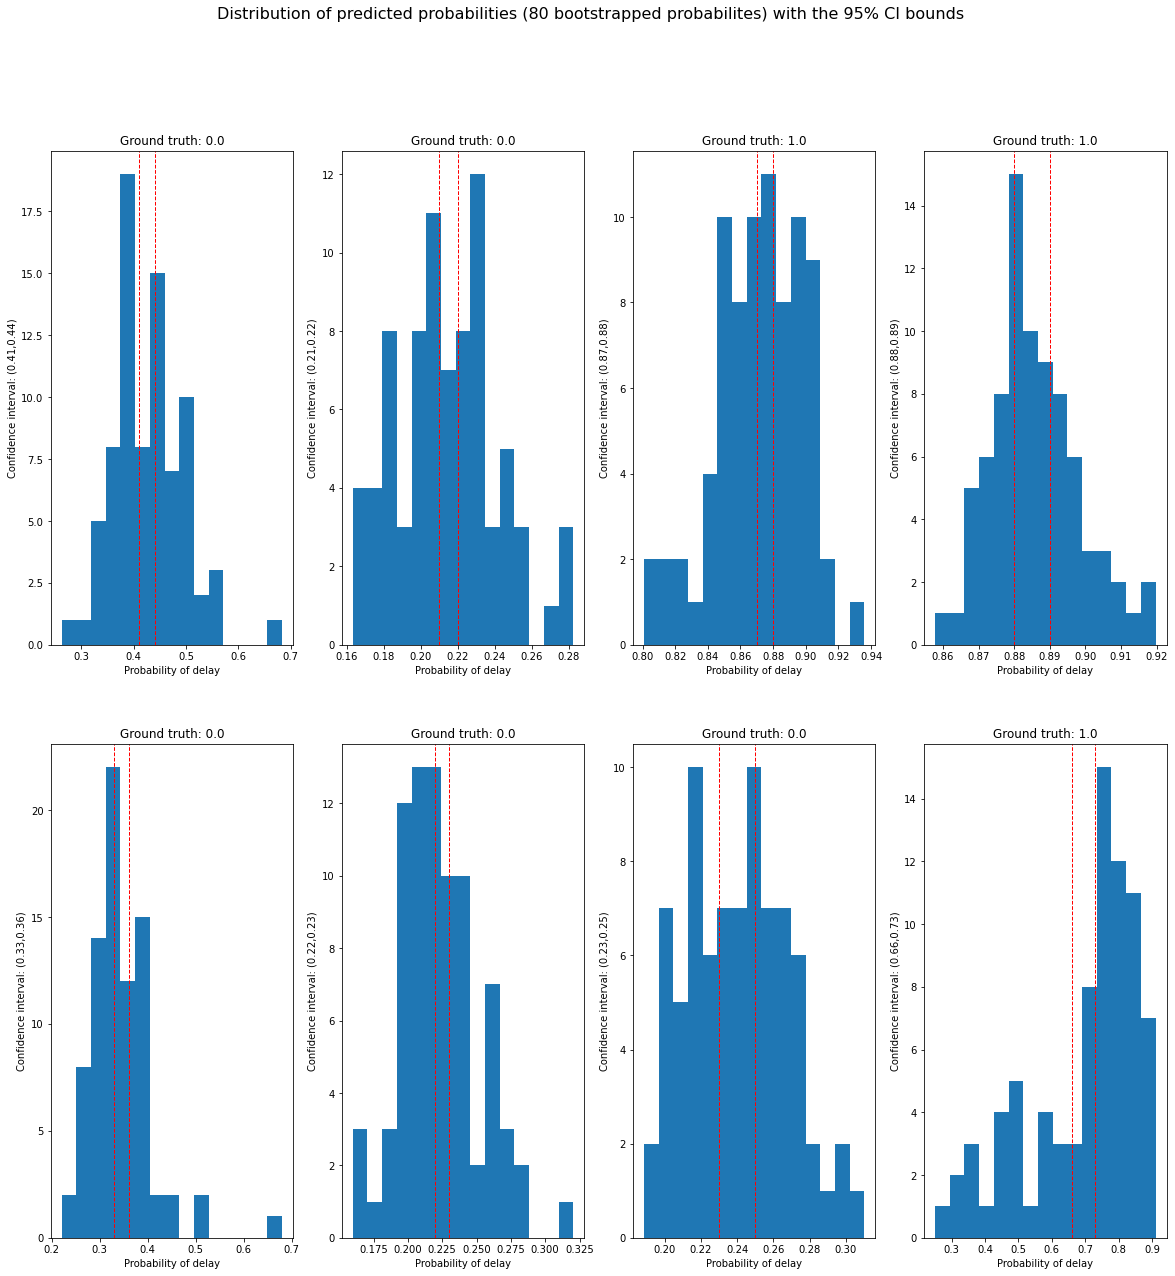

In [44]:
fig,axes=plt.subplots(2,4,figsize=(20,20))
fig.suptitle('Distribution of predicted probabilities (80 bootstrapped probabilites) with the 95% CI bounds',fontsize=16)
num=0
for ax in axes.ravel():
    interval=confidence_interval(histogram[num])
    ax.hist(histogram[num],bins=15)
    ax.set_xlabel('Probability of delay')
    ax.set_title(f'Ground truth: {y_test.iloc[num]}')
    ax.set_ylabel(f'Confidence interval: ({interval[0]},{interval[1]})')
    ax.axvline(interval[0],color='r',linestyle='dashed',linewidth=1)
    ax.axvline(interval[1],color='r',linestyle='dashed',linewidth=1)
    num+=1

In [25]:
import pickle
with open("test.txt", "wb") as fp:
    pickle.dump(histogram,fp)

In [41]:
import pickle
with open("test.txt", "rb") as fp:
    histogram=pickle.load(fp)

**INTERPRETATION:**

From the histograms of these 8 observations, we can see that the distribution of the predicted probabilities almost follow a normal distribution. This is a direct consequence of the Central Limit Theorem. Bootstrapping is a popular ensemble learning technique which improves generalization. From the confidence intervals of these observations, we can see that the predicted probabilities concur with the ground truth. Increasing the number of bootstraps will increase the confidence of the model's prediction. 

<div class='exercise-r'>

**1.6**

</div>

In [45]:
PPR=[]
soft_predictions=[]
for obs in histogram:
    hard_predictions=(np.array(obs)>0.5).astype('int32')
    ppr=sum(hard_predictions)/hard_predictions.shape[0]
    PPR.append(ppr)
    if np.array(obs).mean()>0.5:
        soft_predictions.append(1)
    else:
        soft_predictions.append(0)

In [46]:
print(f'The test accuracy obtained from bootstrapping: {accuracy_score(y_test,soft_predictions)}')

The test accuracy obtained from bootstrapping: 0.7275


In [47]:
def observe(arr,ppr,threshold):
    new_arr=[]
    for i in range(len(ppr)):
        if ppr[i]<threshold:
            new_arr.append(arr[i])
    return new_arr

In [48]:
PPR_thresh=[i/10 for i in range(11)]
accuracies=[]
proportion=[]
for thresh in PPR_thresh:
    truth=observe(list(y_test),PPR,thresh)
    predictions=observe(soft_predictions,PPR,thresh)
    accuracies.append(accuracy_score(truth,predictions))
    proportion.append(len(predictions)/len(soft_predictions))

c:\python37\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\python37\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Plot of Test accuracy vs PPR threshold')

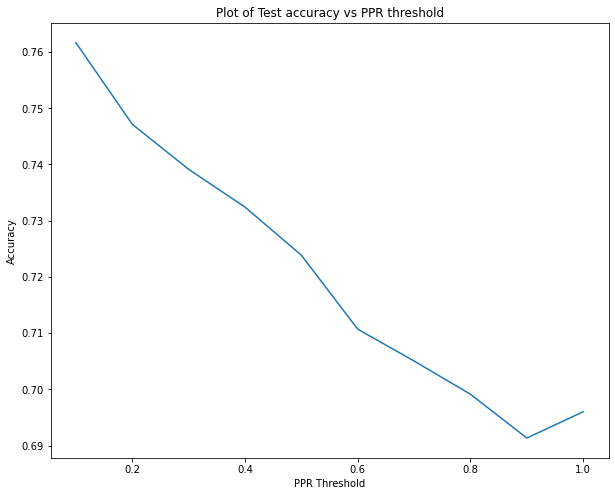

In [51]:
# Plot of Accuracy vs PPR threshold
plt.plot(PPR_thresh,accuracies)
plt.xlabel('PPR Threshold')
plt.ylabel('Accuracy')
plt.title('Plot of Test accuracy vs PPR threshold')

Text(0.5, 1.0, 'Plot of proportion of non-abstained observations vs PPR threshold')

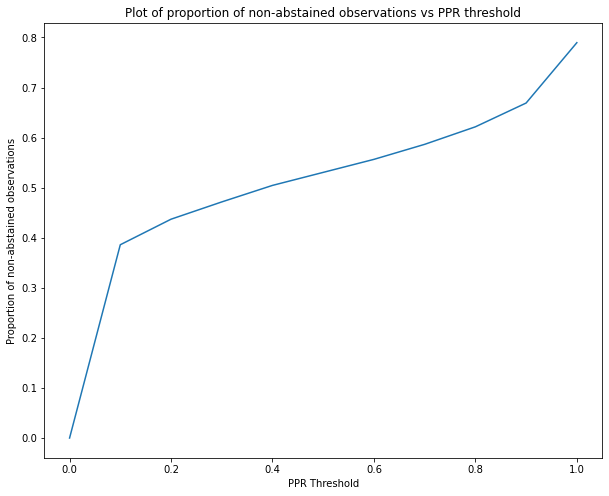

In [50]:
# Plot of proportion of non-abstained observations vs PPR threshold
plt.plot(PPR_thresh,proportion)
plt.xlabel('PPR Threshold')
plt.ylabel('Proportion of non-abstained observations')
plt.title('Plot of proportion of non-abstained observations vs PPR threshold')

**INTERPRETATION:**

We observe that as PPR decreases (more confident predictions), we must compromise on the number of observations that the abstain model predicts confidently. Also, when the proportion of non-abstained observations is low, the test accuracy is higher. The test accuracy decreases as the proportion of non-abstained observations increases. 

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">


<h1>PART 2 [50 pts]: Kannada MNIST Kaggle competition</h1>
<br /><br />
[Return to contents](#contents)
<br /><br />

<a id="part2intro"></a>
<h2> Problem Statement </h2>
<br /><br />
[Return to contents](#contents)
<br /><br />

ANNs can be prone to overfitting, where they learn specific patterns present in the training data, but the patterns do not generalize to new data.
<br /><br />
There are several methods used to improve ANN generalization. 
<br /><br />
One approach is to use an architecture just barely wide or deep enough to fit the data. The idea here is that smaller networks are less expressive and thus less able to overfit the data.
<br /><br />
However, it is difficult to know a priori the correct size of the ANN, and it is computationally costly to hunt for the correct size. Given this, other methodologies are used to prevent overfitting and improve ANNs' generalizability. These methodologies, like other techniques that combat overfitting, fall under the umbrella term of "regularization".
<br /><br />
In this problem, you are asked to regularize a network of a given architecture.

<a id="part2about"></a>
<br /><br />
<h3> The Kannada MNIST Dataset </h3>
<br /><br />
[Return to contents](#contents)
<br /><br />

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3630446%2F1e01bcc28b5ccb7ad38a4ffefb13cde0%2Fwondu.png?generation=1603204077179447&alt=media)

<br /><br />
For this problem, we will be working with a modified version of [Kannada MNIST dataset](https://arxiv.org/pdf/1908.01242.pdf) , which is a large database of handwritten digits in the indigenous language *Kannada*.
<br /><br />
This dataset consists of 60,000 28x28 grayscale images of the ten digits, along with a test set of 10,000 images. 
<br /><br />
For this homework, we will simplify the problem by only use the digits labeled `0` and `1` owing to the similarity of the two symbols, and we want to use a total of 1200 samples for training (this includes the data you will use for validation).
<br /><br />
To understand the dataset better, we recommend this [article](https://towardsdatascience.com/a-new-handwritten-digits-dataset-in-ml-town-kannada-mnist-69df0f2d1456) by Vinay Prabhu, the curator of the dataset.
<br /><br />
<a id="part2data"></a>

<h4> Downloading the Data Files </h4>
<br />
[Return to contents](#contents)
<br />
Please download all files from kaggle [using this link](https://www.kaggle.com/t/35a69f4cdf2747b49ee216bd9f16a0db).
<br /><br />
Here's a brief description of the available files:
<br /><br />
- `kmnist_train.csv` is our training dataset and the last column contains our response class. The 784 other columns correspond to the pixel values of the 28x28 dimension image.
<br /><br />
Class 0 means a sample is the handwritten digit `0` and class 1 means a sample is the handwritten digit `1` in the Kannada language.  
<br />
- `kmnist_test.csv` has a structure similar to `kmnist_train.csv`, however the class label column is NOT included in with the test set. `kmnist_test.csv` has 2000 samples. 
<br /><br />
Kaggle leaderboard scores are accuracy scores calculated by Kaggle when you upload your predictions on this test set.
<br /><br />
- `sample_submission.csv` is the format that kaggle will accept.
<br /><br />
<a id="part2kaggle"></a>

<h3> AI2-C1 Homework1 Kaggle Competition </h3>
<br /><br />
[Return to contents](#contents)
<br /><br />
You need to create an account on Kaggle and join the competition via this [link](https://www.kaggle.com/t/35a69f4cdf2747b49ee216bd9f16a0db). **This is a limited participation competition. Please DO NOT share this link.**
<br /><br />
For more information on the rules governing this Kaggle competition, **please [see question 2.3 below](#part2_3).**

</div>

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<h2>PART2 Questions</h2>
<br /><br />
[Return to contents](#contents)

<br /><br />
**2.1 [5 points]** **Get the data:**

- Download data from the competition page.
- We will utilize `kmnist_test.csv` in question 2.3.4 only. 
- Load the data and use the matplotlib function `imshow` to display a handwritten 0 and a handwritten 1.
<br /><br />
**2.2 [15 points]** **Overfit an ANN:** 

Build a fully-connected network (FCN) with the architecture given below using `tensorflow.keras` and assign it to a variable called `model_overfit`:

- Number of hidden layers: 3
- Nodes per hidden layer: 100, 100, 100
- Activation function: ReLU 
- Loss function: binary_crossentropy
- Output unit: Sigmoid 
- Optimizer: adam (use the defaults; no other tuning)
- Epochs: no more than 2,000
- Batch size: 128
- Validation size: 0.3

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3630446%2F6a491ff8d4ff590dc8ded9a25461cd4b%2FScreenshot%202020-10-20%20at%209.42.36%20PM.png?generation=1603210420701577&alt=media) 
    
This ANN, when trained on the dataset, will overfit to the training set. Plot the training accuracy and validation accuracy (the x-axis should represent the number of epochs, and the y-axis should represent the accuracy). Explain how you can tell the model is overfitting. 

<a id="part2_3"></a>
<br /><br />

**2.3 [30 points]** **Regularize overfit network:**

Create an ANN that doesn't overfit and compete on Kaggle.
<br /><br />
**DON'TS**

**Don't change the architecture**. In other words, keep the number of layers, number of nodes, activation function,  loss function and output unit the same. **No CNNs/RNNs/enhancements.**

<br />
    
**NOTE**: We strongly discourage you to use a different training set than the one provided to you (Data augmentation is allowed). If the test set accuracy of your model in this notebook is significantly different than your kaggle submission score, you will receive zero credit for this segment of the homework.

<br /><br />
    
**DOS**

You can change the number of epochs (max 2000), batch size, optimizer, and of course, add elements that can help to regularize (e.g., dropout, L2 norm, etc.). You can also do data augmentation. 
<br /><br />

- **2.3.1** Display your model summary and your training and validation accuracy and loss.

<br />
- **2.3.2** Print the difference between the training and validation accuracies and the difference between the training and validation losses for the final trained epoch used by your model.

<br />
- **2.3.3** Plot the training accuracy and validation accuracy as a function of epochs.
<br />

- **2.3.4** Generate your test set class predictions using your regularized model. Save those predictions to a `.csv` formatted file. Submit that `.csv` file to this Kaggle Competition for leaderboard scoring.
<br />

- **2.3.5** **Specify your Kaggle name that you have used on the leaderboard**. *We can't give you credit without this.*

<br /><br />
    
**IMPORTANT NOTES ABOUT SCORING**:

- The **public leaderboard** on kaggle only displays your performance on 50% of the test set.


- After the competition is complete, the **private leaderboard** will show your performance on the FULL test set.
    
Only the **top 5** competitors (as ranked on the hidden private leaderboard) will be eligible for full credit on question 2.3 (out of **30 points**). Remaining competitors will be scored out of **25 points** only for 2.3.

<br /><br />
    
**ADDITIONAL RULES:**

- Multiple Kaggle submissions are permitted, **just note** that you will need to choose, on Kaggle, which submission shall be used for final scoring.

<br /><br />
- The version of your final notebook submitted on edStem **must contain the same model** used to generate to your chosen Kaggle submission.
<br /><br />

- **Please do not manually label your submissions.** In other words, the labels should only be the outcome of your model.

<br /><br />
- **No external data are allowed, please only use the KMNIST training data downloaded via the link above for training your model.**
<br /><br />

- **Do not** create multiple accounts on Kaggle.

</div>

<a id="part2solutions"></a>

## PART 2 Solutions

[Return to contents](#contents)


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train = pd.read_csv('../input/ai2hw1/kmnist_train.csv')
test = pd.read_csv('../input/ai2hw1/kmnist_test.csv')

In [ ]:
train.shape

In [ ]:
train.head()

In [ ]:
x_train = train.drop(columns='output')
y_train = train['output']

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(test)

In [ ]:
x_train = x_train/255.0
x_test = test/255.0

In [ ]:
model1 = models.Sequential(name='over_fitting')
model1.add(layers.Dense(100, input_shape=(784,), activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=0), name='hidden_1'))
model1.add(layers.Dense(100, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=0), name='hidden_2'))
model1.add(layers.Dense(100, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=0), name='hidden_3'))
model1.add(layers.Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=0), name='output'))

model1.summary()

In [ ]:
model1.compile(optimizer='adam', 
               loss='binary_crossentropy', 
               metrics=['accuracy'])

history_1 = model1.fit(x_train, y_train, validation_split=0.3, batch_size=128, verbose=1, epochs=1500)

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (16,4))
ax[0].plot(history_1.history['loss'],color='#EFAEA4',label = 'Training Loss')
ax[0].plot(history_1.history['val_loss'],color='#B2D7D0',label = 'Validation Loss')
ax[1].plot(history_1.history['accuracy'],color='#EFAEA4',label = 'Training Accuracy')
ax[1].plot(history_1.history['val_accuracy'],color='#B2D7D0',label = 'Validation Accuracy')
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs');
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy %');
fig.suptitle('MLP Training', fontsize = 24)

print('Training Accuracy:{} \nValidation Accuracy:{}'.format(history_1.history['accuracy'][-1], history_1.history['val_accuracy'][-1]))

In [ ]:
model2 = models.Sequential(name='regularized')
model2.add(layers.Dense(100, input_shape=(784,), activation='relu', name='hidden1', kernel_regularizer=regularizers.l2(0.0005)))
model2.add(layers.Dense(100, activation='relu', name='hidden2', kernel_regularizer=regularizers.l2(0.0005)))
model2.add(layers.Dense(100, activation='relu', name='hidden3', kernel_regularizer=regularizers.l2(0.0005)))
model2.add(layers.Dropout(0.1))
model2.add(layers.Dense(1, activation='sigmoid', name='output1'))

model2.summary()

In [ ]:
model2.compile(optimizer=optimizers.SGD(learning_rate=0.5, momentum=0.1), 
               loss='binary_crossentropy', 
               metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=250)

history_2 = model2.fit(x_train, y_train, validation_split=0.3, batch_size=128, verbose=1, epochs=500, callbacks=[callback])

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (16,4))
ax[0].plot(history_2.history['loss'],color='#EFAEA4',label = 'Training Loss')
ax[0].plot(history_2.history['val_loss'],color='#B2D7D0',label = 'Validation Loss')
ax[1].plot(history_2.history['accuracy'],color='#EFAEA4',label = 'Training Accuracy')
ax[1].plot(history_2.history['val_accuracy'],color='#B2D7D0',label = 'Validation Accuracy')
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs');
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy %');
fig.suptitle('MLP Training', fontsize = 24)

print('Training Accuracy:{} \nValidation Accuracy:{}'.format(history_2.history['accuracy'][-1], history_2.history['val_accuracy'][-1]))

In [ ]:
max(history_2.history['val_accuracy'])

In [ ]:
y_pred_test = model2.predict_classes(x_test)

In [ ]:
submission=pd.read_csv('../input/ai2hw1/sample_submission.csv')

In [ ]:
submission['category'] = y_pred_test

In [ ]:
submission.to_csv('test11.csv', index=False)

**YOUR KAGGLE LEADERBOARD NAME:**

Vishal Rishi